In [1]:
import numpy as np
import matplotlib.pyplot as plt

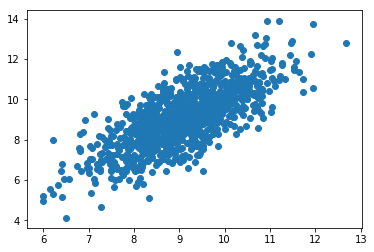

(1000,)


In [3]:
data  = np.genfromtxt("PCAdata.txt",delimiter="")
x_data = data[:,0]
y_data = data[:,1]
plt.scatter(x_data,y_data)
plt.show()
print(x_data.shape)

####  数据中心化

In [7]:
def zeroMean(dataMat):
#     按列求平均，即各个特征的平均
         meanVal = np.mean(dataMat,axis=0)
         newData = dataMat - meanVal
         return newData,meanVal

In [8]:
newData,meanVal = zeroMean(data)
# np.cov用于求协方差矩阵，参数rowvar = 0说明数据行代表一个样本
covMat = np.cov(newData,rowvar=0)

In [9]:
# 协方差矩阵
covMat

array([[1.05198368, 1.1246314 ],
       [1.1246314 , 2.21166499]])

In [10]:
# np.linalg.eig求矩阵的特征值和特征向量
eigVals,eigVects = np.linalg.eig(np.mat(covMat))

In [11]:
# 特征值
eigVals

array([0.36651371, 2.89713496])

In [13]:
# 特征向量
eigVects

matrix([[-0.85389096, -0.52045195],
        [ 0.52045195, -0.85389096]])

In [14]:
# 对特征值从小到大排序
eigValIndice = np.argsort(eigVals)
eigValIndice

array([0, 1], dtype=int64)

In [15]:
top = 1
# 最大的n个特征值的下标
n_eigValIndice = eigValIndice[-1:-(top+1):-1]  #从右往左取数据

In [16]:
n_eigValIndice

array([1], dtype=int64)

In [17]:
# 最大的n个特征值对应的特征向量
n_eigVect = eigVects[:,n_eigValIndice]
n_eigVect

matrix([[-0.52045195],
        [-0.85389096]])

In [18]:
#低维特征空间的数据
lowDataMat = newData*n_eigVect
lowDataMat

matrix([[-2.51033597e+00],
        [-2.86915379e+00],
        [ 9.74108510e-02],
        [-7.67782222e-01],
        [ 1.02715333e+00],
        [-1.44409178e+00],
        [-2.17360352e+00],
        [-7.73998803e-01],
        [-1.09983463e+00],
        [-1.70275987e+00],
        [-5.39605615e-01],
        [-9.15572638e-01],
        [-2.42669452e+00],
        [ 2.93613464e+00],
        [ 3.92702506e-01],
        [ 2.59205734e+00],
        [ 4.96435625e-01],
        [-1.52069930e+00],
        [ 1.25471104e-01],
        [ 1.41846162e+00],
        [ 5.89902904e-01],
        [ 6.69601540e-01],
        [ 3.25466068e-01],
        [ 1.18812333e+00],
        [ 2.07790920e+00],
        [ 3.24938650e-01],
        [ 3.41109884e+00],
        [ 1.92249899e+00],
        [-6.57788287e-01],
        [-3.56836313e-01],
        [ 5.72240108e-02],
        [ 1.13444036e+00],
        [-2.47196176e-01],
        [ 1.14678135e+00],
        [ 1.62503940e+00],
        [-2.11489136e+00],
        [ 1.62262452e+00],
 

####  利用低纬度数据来重构数据

In [19]:
reconMat = (lowDataMat*n_eigVect.T)+meanVal
reconMat

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

#### 载入数据

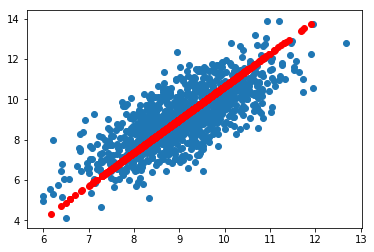

In [22]:
data = np.genfromtxt("PCAdata.txt",delimiter="")
x_data = data[:,0]
y_data = data[:,1]
plt.scatter(x_data,y_data)
# 重构的数据
x_data = np.array(reconMat)[:,0]
y_data = np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()